In [1]:
import numpy as np
import matplotlib.pyplot as plt

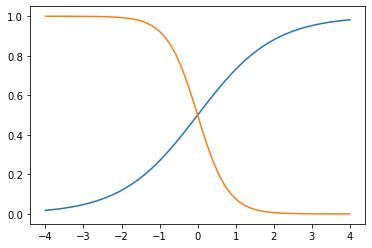

In [2]:
def sigmoid(a,s=1):
    return 1/(1+np.exp(-s*a))

def reverse_sigmoid(a,s=1):
    return 1-sigmoid(a,s)

supp = np.linspace(-4,4)
sigmoid(supp)

plt.plot(supp, sigmoid(supp))
plt.plot(supp, 1-sigmoid(supp,s=2.5))

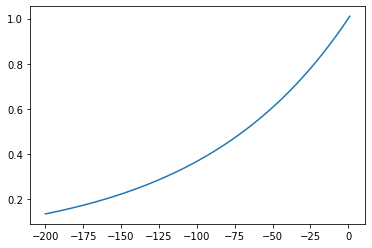

In [3]:
supp = np.linspace(-200, 1, 500)
plt.plot(supp, np.exp(0.01*supp))

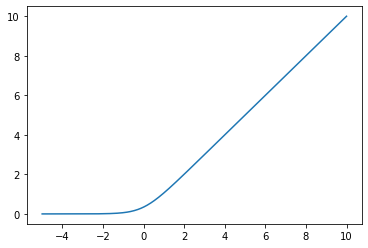

In [4]:
def smooth_max(x, alpha=2):
    return x + 1/alpha*np.log(1+np.exp(-alpha*x))

supp = np.linspace(-5,10,500)

plt.plot(supp, smooth_max(supp))

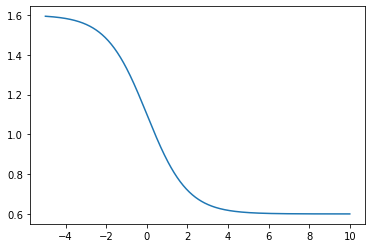

In [12]:
def smooth_step(x, alpha=1.):
    return 1+0.6-1/(1+np.exp(-alpha*x))

supp = np.linspace(-5,10,500)

plt.plot(supp, smooth_step(supp))

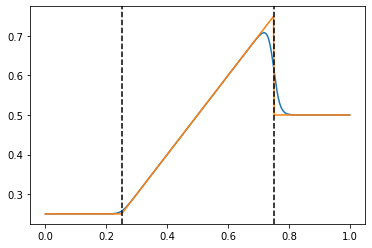

In [25]:
def revenue_smooth(b1, b2, r, x0=0.2, alpha=10):
    smooth_max = r + 1/alpha*np.log(1+np.exp(-alpha*(r-b2)))
    shift = r - b1 + 1/alpha*np.log(1+np.exp(-alpha*(r-b1)))
    smooth_step = (b1-x0) / (1+np.exp(-alpha*(r-b1)))
    return smooth_max - shift - smooth_step

def revenue(b1, b2, r, x0=0.2):
    rev = np.where(r<b2, b2, np.where(r>b1, x0, r))
    return rev

supp = np.linspace(0,1,500)

b1, b2, x0 = 0.75, 0.25, 0.5
plt.plot(supp, revenue_smooth(b1, b2, supp, x0, alpha=100))
plt.plot(supp, revenue(b1, b2, supp, x0))
plt.axvline(b2, c='k', ls='--')
plt.axvline(b1, c='k', ls='--')

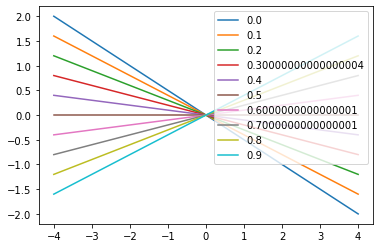

In [17]:
def cost(bid, fee, bid_bar=0, fee_bar=0.5):
    return (bid-bid_bar)*(fee-fee_bar)

supp = np.linspace(-4,4)
for fee in np.arange(0,1,0.1):
    c = cost(supp, fee)
    plt.plot(supp, c, label=fee)
plt.legend()